In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [14]:
unemp=pd.read_csv("NYC_umploymentRate.csv")

In [28]:
unemp=unemp.ix[:, 0:7] #only select first seven useful columns

,﻿YEAR,Labor Force,Employment,Emp/Pop,Unemployed,Unemp Rate,LFPART
1,Jan-76,"3,117.2","2,771.1",48.7,346.1,11.1,54.7
2,Feb-76,"3,114.7","2,770.0",48.7,344.7,11.1,54.7
3,Mar-76,"3,112.6","2,768.8",48.7,343.8,11.0,54.7
4,Apr-76,"3,111.6","2,767.9",48.7,343.7,11.0,54.7
5,May-76,"3,112.0","2,767.2",48.7,344.8,11.1,54.7


In [29]:
unemp.info()
unemp=unemp.dropna(subset=['\ufeffYEAR'])
unemp['Date'] = pd.to_datetime(unemp['\ufeffYEAR'], format="%b-%y")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 1 to 504
Data columns (total 7 columns):
﻿YEAR          504 non-null object
Labor Force    494 non-null object
Employment     494 non-null object
Emp/Pop        494 non-null object
Unemployed     494 non-null object
Unemp Rate     494 non-null object
LFPART         494 non-null object
dtypes: object(7)
memory usage: 31.5+ KB


In [31]:
unemp['Year'] = unemp['Date'].map(lambda x: x.year )
unemp['Month'] = unemp['Date'].map(lambda x: x.month )

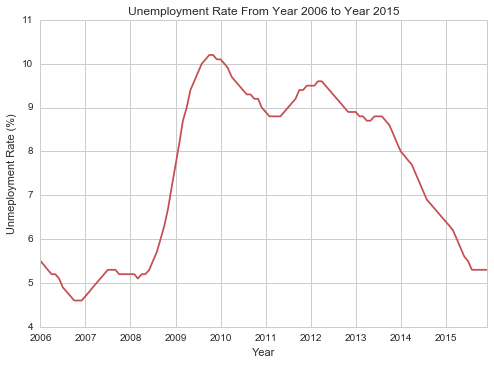

In [90]:
select_range=unemp[(unemp['Year']>=2006)&(unemp['Year']<=2015)]
plt.plot_date(x=select_range['Date'], y=select_range['Unemp Rate'], fmt="r-")
plt.title("Unemployment Rate From Year 2006 to Year 2015")
plt.xlabel("Year")
plt.ylabel("Unmeployment Rate (%)")
plt.savefig("unemploymentRate.jpeg")
plt.show()

In [55]:
crimes=pd.read_csv("crimesPerYear.csv",names = ["number", "Year"])
crimes.head()

,number,Year
0,538152.0,2006
1,537201.0,2007
2,528675.0,2008
3,510946.0,2009
4,509725.0,2010


In [58]:
crimes=crimes[crimes['Year']!='year']  #there is a row where Year is year
crimes

,number,Year
0,538152.0,2006
1,537201.0,2007
2,528675.0,2008
3,510946.0,2009
4,509725.0,2010
5,498198.0,2011
6,504128.0,2012
7,494958.0,2013
8,490363.0,2014
9,468576.0,2015


In [67]:
#convert to datetime type so we can plot time_series data
crimes['Year'] = pd.to_datetime(crimes['Year'], format="%Y")

/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


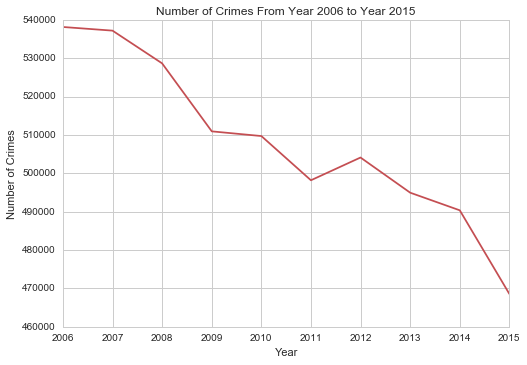

In [71]:
plt.plot_date(x=crimes['Year'], y=crimes['number'], fmt="r-")
plt.title("Number of Crimes From Year 2006 to Year 2015")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.savefig("crimes2006to2015.jpeg")
plt.show()

In [74]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
number    10 non-null object
Year      10 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 240.0+ bytes


### Calculate correlation

In [88]:
select_range['Unemp Rate']=select_range['Unemp Rate'].astype(float)

/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [92]:
meanUnempRate=select_range['Unemp Rate'].groupby(select_range['Year']).mean()
#select_range[select_range['Month']==8]

In [93]:
type(meanUnempRate)

pandas.core.series.Series

In [111]:
unempRate=pd.Series(meanUnempRate.values)

In [112]:
unempRate

0    4.991667
1    5.100000
2    5.716667
3    9.416667
4    9.516667
5    9.050000
6    9.291667
7    8.683333
8    7.233333
9    5.691667
dtype: float64

In [120]:
crimes['number']=crimes['number'].astype(float)
#correlation
crimes['number'].corr(unempRate)

/Users/yiranxu/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


-0.35471915329646375

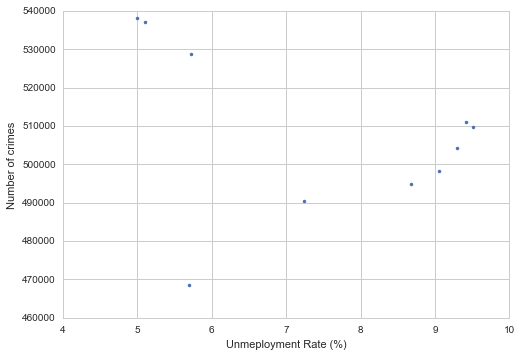

In [126]:
plt.plot(unempRate, crimes['number'], '.')
plt.xlabel("Unmeployment Rate (%)")
plt.ylabel("Number of crimes")
plt.savefig("crimesVSnumber_crimes.jpeg")
plt.show()